In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pizza_sales_new.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df_q = df[['order_date', 'quantity']]

In [5]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48554 entries, 0 to 48553
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_date  48554 non-null  object
 1   quantity    48554 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 758.8+ KB


In [6]:
df_q['order_date'] = pd.to_datetime(df_q['order_date'])

C:\Users\New\AppData\Local\Temp\ipykernel_12032\1388486045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q['order_date'] = pd.to_datetime(df_q['order_date'])


In [62]:
df_q = df_q.set_index('order_date')

In [63]:
df_q_dailyTotal = df_q.groupby('order_date')['quantity'].sum().reset_index()

In [64]:
df_q_dailyTotal = df_q_dailyTotal.set_index('order_date')

In [65]:
df_q_dailyTotal.head()

,quantity
order_date,
2015-01-01,156
2015-01-02,160
2015-01-03,143
2015-01-04,92
2015-01-05,106


<Axes: xlabel='order_date', ylabel='quantity'>

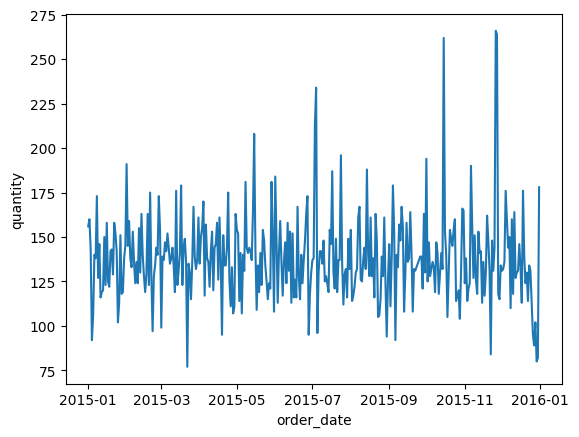

In [66]:
sns.lineplot(data=df_q_dailyTotal, x=df_q_dailyTotal.index, y=df_q_dailyTotal['quantity'])

In [67]:
len(df_q_dailyTotal)

358

### stationary check

In [68]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_q_dailyTotal['quantity'],autolag="AIC")
print(result[0])
print(result[1])

-5.208669713882253
8.440743456858167e-06


In [69]:
result

(np.float64(-5.208669713882253),
 np.float64(8.440743456858167e-06),
 15,
 342,
 {'1%': np.float64(-3.4496162602188187),
  '5%': np.float64(-2.870028369720798),
  '10%': np.float64(-2.5712922615505627)},
 np.float64(3087.628832197186))

In [70]:
stats = pd.Series(result[:4],index=['Test stat','p-value','lag used','no of observation'])

In [71]:
stats

Test stat             -5.208670
p-value                0.000008
lag used              15.000000
no of observation    342.000000
dtype: float64

In [72]:
df_q_dailyTotal['quantity_diff'] = df_q_dailyTotal['quantity'].diff()

In [73]:
df_q_dailyTotal.head()

,quantity,quantity_diff
order_date,,
2015-01-01,156,NaN
2015-01-02,160,4.0
2015-01-03,143,-17.0
2015-01-04,92,-51.0
2015-01-05,106,14.0


In [74]:
result_diff = adfuller(df_q_dailyTotal['quantity_diff'].dropna())

print(result_diff[0])
print(result_diff[1])

-7.615140748741752
2.2019870622961792e-11


In [75]:
result_diff

(np.float64(-7.615140748741752),
 np.float64(2.2019870622961792e-11),
 16,
 340,
 {'1%': np.float64(-3.4497304638968043),
  '5%': np.float64(-2.8700785273763487),
  '10%': np.float64(-2.571319005190311)},
 np.float64(3097.525490680961))

In [76]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

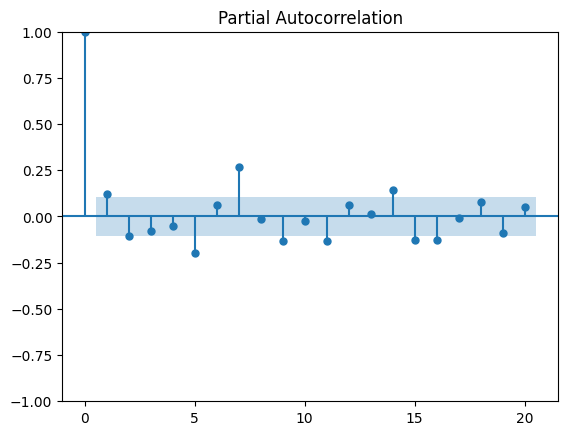

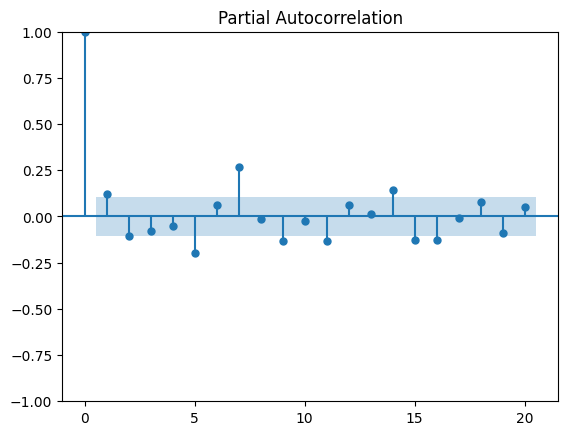

In [77]:
plot_pacf(df_q_dailyTotal['quantity'],lags=20)

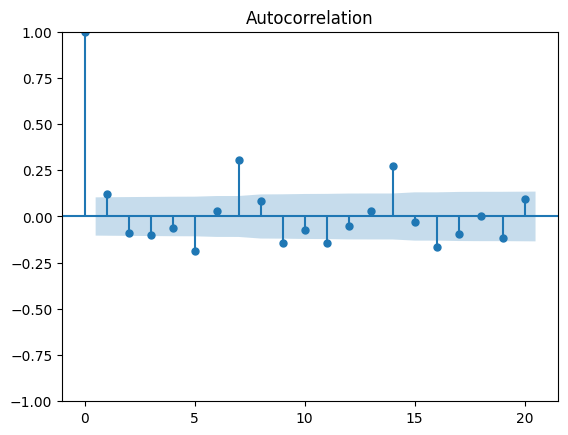

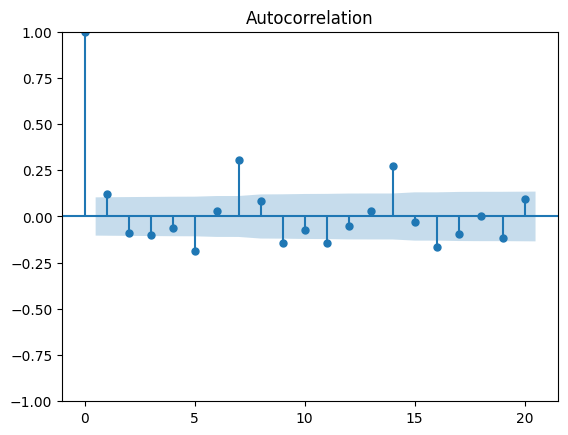

In [78]:
plot_acf(df_q_dailyTotal['quantity'],lags=20)

In [82]:
len(df_q_dailyTotal)

358

In [85]:
test_len = round(len(df_q_dailyTotal*0.7))

In [86]:
test_len

358

In [87]:
train = df_q_dailyTotal[:round(len(df_q_dailyTotal)*0.7)]
test = df_q_dailyTotal[round(len(df_q_dailyTotal)*0.7):]

In [91]:
from statsmodels.tsa.arima.model import ARIMA

# Adjust the ARIMA model parameters as needed
model = ARIMA(train['quantity'], order=(5, 1, 5))
model_fit = model.fit()


d:\guvi\Dominos_Predictive_Purchase_Order-System\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\guvi\Dominos_Predictive_Purchase_Order-System\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
prediction

2015-09-09    125.819082
2015-09-10    142.233154
2015-09-11    166.588653
2015-09-12    146.683542
2015-09-13    119.457375
                 ...    
2015-12-27    121.506971
2015-12-28    136.993816
2015-12-29    142.205963
2015-12-30    126.968892
2015-12-31    138.657446
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

In [93]:
test['quanity_pred'] = prediction


C:\Users\New\AppData\Local\Temp\ipykernel_16088\2552645031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['quanity_pred'] = prediction


In [94]:
test

,quantity,quantity_diff,quanity_pred
order_date,,,
2015-09-09,157,24.0,125.819082
2015-09-10,148,-9.0,142.233154
2015-09-11,167,19.0,166.588653
2015-09-12,156,-11.0,146.683542
2015-09-13,108,-48.0,119.457375
...,...,...,...
2015-12-27,89,-6.0,121.506971
2015-12-28,102,13.0,136.993816
2015-12-29,80,-22.0,142.205963


<Axes: xlabel='order_date', ylabel='quantity'>

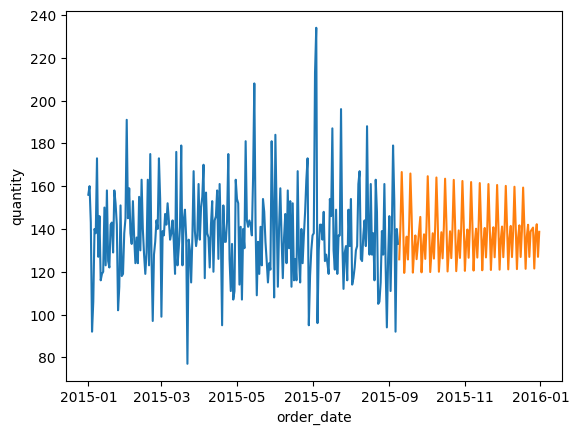

In [96]:
sns.lineplot(data=train,x=train.index,y=train['quantity'])
sns.lineplot(data=test,x=test.index,y=test['quanity_pred'])

# Flight_dataset

In [19]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [21]:
df_flight = sns.load_dataset('flights')

In [31]:
df_flight.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [28]:
df_flight['yearMonth'] = pd.to_datetime('01-' + df_flight['month'].astype(str)+'-' + df_flight['year'].astype(str))

In [30]:
df_flight = df_flight.set_index('yearMonth')

<Axes: xlabel='yearMonth', ylabel='passengers'>

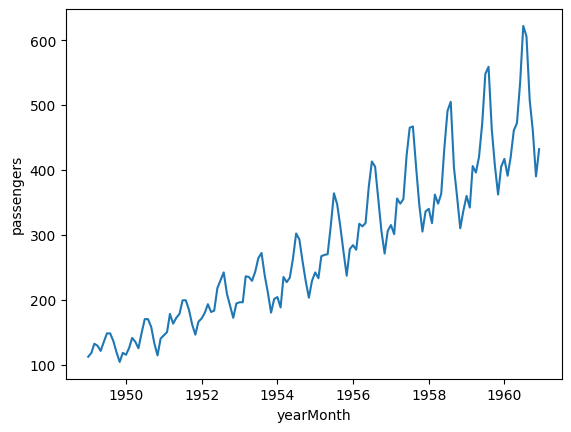

In [32]:
sns.lineplot(data=df_flight, x=df_flight.index, y=df_flight['passengers'])